In [1]:
# Load the dataset
import numpy as np
import pandas as pd
df = pd.read_csv('cars_clus.csv')
df.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.000,21.500,1.800,140.000,101.200,67.300,172.400,2.639,13.200,28.000,2.828,0.0
1,Acura,TL,39.384,19.875,0.000,28.400,3.200,225.000,108.100,70.300,192.900,3.517,17.200,25.000,3.673,0.0
2,Acura,CL,14.114,18.225,0.000,$null$,3.200,225.000,106.900,70.600,192.000,3.470,17.200,26.000,2.647,0.0
3,Acura,RL,8.588,29.725,0.000,42.000,3.500,210.000,114.600,71.400,196.600,3.850,18.000,22.000,2.150,0.0
4,Audi,A4,20.397,22.255,0.000,23.990,1.800,150.000,102.600,68.200,178.000,2.998,16.400,27.000,3.015,0.0


In [2]:
# Print info about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   manufact   157 non-null    object 
 1   model      159 non-null    object 
 2   sales      159 non-null    object 
 3   resale     159 non-null    object 
 4   type       159 non-null    object 
 5   price      159 non-null    object 
 6   engine_s   159 non-null    object 
 7   horsepow   159 non-null    object 
 8   wheelbas   159 non-null    object 
 9   width      159 non-null    object 
 10  length     159 non-null    object 
 11  curb_wgt   159 non-null    object 
 12  fuel_cap   159 non-null    object 
 13  mpg        159 non-null    object 
 14  lnsales    159 non-null    object 
 15  partition  159 non-null    float64
dtypes: float64(1), object(15)
memory usage: 20.0+ KB


In [3]:
# Clean the dataset and Fill/Drop Missing Values
numeric_columns = ['sales','resale','type','price','engine_s','horsepow','wheelbas','width','length','curb_wgt','fuel_cap','mpg','lnsales']
df.dropna(axis=0, inplace=True)
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')
df.fillna(df.median(numeric_only=True), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   manufact   157 non-null    object 
 1   model      157 non-null    object 
 2   sales      157 non-null    float64
 3   resale     157 non-null    float64
 4   type       157 non-null    float64
 5   price      157 non-null    float64
 6   engine_s   157 non-null    float64
 7   horsepow   157 non-null    float64
 8   wheelbas   157 non-null    float64
 9   width      157 non-null    float64
 10  length     157 non-null    float64
 11  curb_wgt   157 non-null    float64
 12  fuel_cap   157 non-null    float64
 13  mpg        157 non-null    float64
 14  lnsales    157 non-null    float64
 15  partition  157 non-null    float64
dtypes: float64(14), object(2)
memory usage: 20.9+ KB


In [4]:
# Select the feature set
feature_set = df[['type','price','engine_s','horsepow','wheelbas','width','length','curb_wgt','fuel_cap','mpg']]
feature_set.head()

,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg
0,0.0,21.500,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0
1,0.0,28.400,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0
2,0.0,22.799,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0
3,0.0,42.000,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0
4,0.0,23.990,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0


In [5]:
# Standardize the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
feature_mtx = scaler.fit_transform(feature_set)
feature_set = pd.DataFrame(feature_mtx, columns=feature_set.columns)
feature_set.head()

,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg
0,-0.594515,-0.410053,-1.214376,-0.814577,-0.827661,-1.121287,-1.119971,-1.182726,-1.228700,0.982411
1,-0.594515,0.075070,0.134385,0.694066,0.081122,-0.246689,0.416070,0.223285,-0.193381,0.272833
2,-0.594515,-0.318723,0.134385,0.694066,-0.076927,-0.159229,0.348634,0.148020,-0.193381,0.509359
3,-0.594515,1.031255,0.423406,0.427835,0.937221,0.073997,0.693306,0.756545,0.013683,-0.436744
4,-0.594515,-0.234987,-1.214376,-0.637089,-0.643270,-0.858907,-0.700370,-0.607830,-0.400444,0.745885


In [6]:
# Calculate the linkage matrix
from scipy.cluster.hierarchy import linkage
Z = linkage(feature_mtx, 'ward')

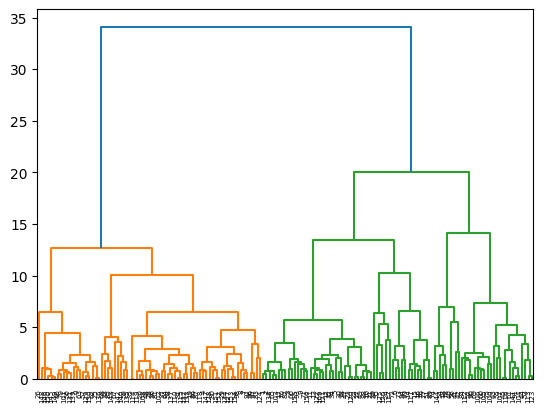

In [7]:
# Plot the dendrogram
from scipy.cluster import hierarchy
dn = hierarchy.dendrogram(Z)

In [8]:
# Apply Agglomerative Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
clustering.fit_predict(feature_set)

array([1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0])

In [9]:
# Assign labels to each entity
df['clusters'] = clustering.labels_
df.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition,clusters
0,Acura,Integra,16.919,16.360,0.0,21.500,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0,1
1,Acura,TL,39.384,19.875,0.0,28.400,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0,0
2,Acura,CL,14.114,18.225,0.0,22.799,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,2.647,0.0,0
3,Acura,RL,8.588,29.725,0.0,42.000,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0,0
4,Audi,A4,20.397,22.255,0.0,23.990,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0,1


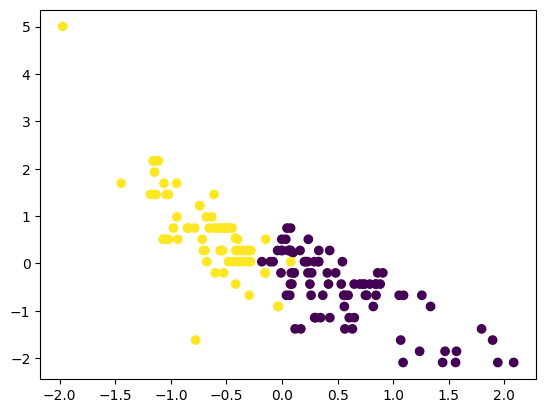

In [10]:
# Plot the clusters
import matplotlib.pyplot as plt
from sklearn.cluster import FeatureAgglomeration
agglo = FeatureAgglomeration(n_clusters=2, metric='euclidean', linkage='ward')
X_reduced = agglo.fit_transform(feature_set)
plt.scatter(X_reduced[:,0], X_reduced[:,1], c=df.clusters)